In [3]:
import pandas as pd
import pickle
from io import StringIO
import requests
from sklearn import preprocessing

In [65]:
# load ml model
loaded_model=pickle.load(open('launch_predict_SpX_DT.sav','rb'))


In [92]:
URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'
data= pd.read_csv(StringIO(requests.get(URL1).text))

X=pd.read_csv(StringIO(requests.get(URL2).text))

transform = preprocessing.StandardScaler()
X1=transform.fit_transform(X)

In [100]:
import joblib
loaded_scaler = joblib.load('model_scaler.joblib')
X2=pd.read_csv('dataset_part_3.csv')
X2.head(2)

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [127]:
import numpy as np
scaled_dat=loaded_scaler.transform(X.iloc[25].to_numpy().reshape(-1,1).T)
np.shape(scaled_dat[0,:])                          

/Users/arunraj/opt/anaconda3/envs/machine_learning/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


(83,)

(83,)

In [88]:
X.shape

(90, 83)

In [84]:
X.iloc[25].to_numpy().reshape(-1,1).T.shape

(1, 83)

In [143]:
loaded_model = joblib.load('launch_predict_SpX_DT.joblib')
loaded_scaler = joblib.load('model_scaler.joblib')

In [154]:
X=pd.read_csv('dataset_part_3.csv')
pr_df=X.iloc[-1].copy()


pr_df['PayloadMass']=X.iloc[25]['PayloadMass']

# pr_df['Orbit']=X.iloc[25 ]['Orbit']
pr_df['ReusedCount']=X.iloc[25]['ReusedCount']
# pr_df['LaunchSite']=X.iloc[25]['LaunchSite']


# scaled_dat=loaded_scaler.transform(pr_df.to_numpy().reshape(1,-1))
# loaded_model.predict(scaled_dat)
# if loaded_model.predict(scaled_dat):
#     print(True)

True


/Users/arunraj/opt/anaconda3/envs/machine_learning/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [197]:
X=pd.read_csv('dataset_part_3.csv')
pr_df=X.iloc[-1].copy()


In [202]:
X.columns

Index(['FlightNumber', 'PayloadMass', 'Flights', 'Block', 'ReusedCount',
       'Orbit_ES-L1', 'Orbit_GEO', 'Orbit_GTO', 'Orbit_HEO', 'Orbit_ISS',
       'Orbit_LEO', 'Orbit_MEO', 'Orbit_PO', 'Orbit_SO', 'Orbit_SSO',
       'Orbit_VLEO', 'LaunchSite_CCAFS SLC 40', 'LaunchSite_KSC LC 39A',
       'LaunchSite_VAFB SLC 4E', 'LandingPad_5e9e3032383ecb267a34e7c7',
       'LandingPad_5e9e3032383ecb554034e7c9',
       'LandingPad_5e9e3032383ecb6bb234e7ca',
       'LandingPad_5e9e3032383ecb761634e7cb',
       'LandingPad_5e9e3033383ecbb9e534e7cc', 'Serial_B0003', 'Serial_B0005',
       'Serial_B0007', 'Serial_B1003', 'Serial_B1004', 'Serial_B1005',
       'Serial_B1006', 'Serial_B1007', 'Serial_B1008', 'Serial_B1010',
       'Serial_B1011', 'Serial_B1012', 'Serial_B1013', 'Serial_B1015',
       'Serial_B1016', 'Serial_B1017', 'Serial_B1018', 'Serial_B1019',
       'Serial_B1020', 'Serial_B1021', 'Serial_B1022', 'Serial_B1023',
       'Serial_B1025', 'Serial_B1026', 'Serial_B1028', 'Serial_B102

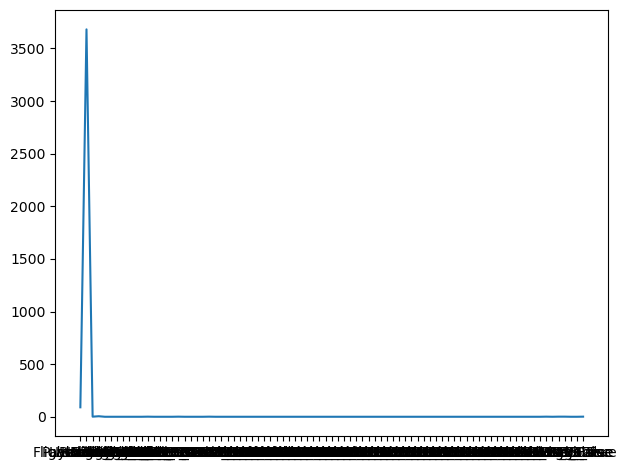

In [200]:
plt.plot(pr_df)
plt.tight_layout()

In [207]:
marks={i: int(i) for i in range(0, 10001, 2000)}
marks

{0: 0, 2000: 2000, 4000: 4000, 6000: 6000, 8000: 8000, 10000: 10000}

In [ ]:
for name in b:
    if name in pr_df.index:
        pr_df[name] = 5000

In [164]:
spacex_geo = pd.read_csv("spacex_launch_geo.csv")
spacex_geo['Orbit'].unique()
# spacex_geo.head()

array(['LEO', 'LEO (ISS)', 'GTO', 'Sun–Earth L1', 'Polar LEO', 'SSO',
       'HEO'], dtype=object)

In [169]:
X.ReusedCount.unique()

array([0., 1., 3., 2., 4., 5.])

In [23]:
load_model.predict(X[25].reshape(1, -1))

array([1])